#### 로지스틱 회귀분석 - 분류용 선형모델

- 이진분류를 회귀로 하자!  범주형 데이터 
- y = ax + b    
- (-∞, ∞)   =>  (0~1)

출력 = (가중치 합 + 패널티)를 예측값(확률값)

임계치보다 작으면 A , 크면 B 이렇게 이진분류

#### 오즈비

= 성공확률/실패확률

로그 오즈비... >> logit 변환
log(오즈비) = ax+b

#### logistic function
- 입력에 대해 0~1로 출력
- s형 커브

LogisticRegression

default 
> - penalty = 'l2'   // l1, l2, elasticnet(l1 + l2), none

> c=1.0  //강도
> - c = inverse ...  score, predict_proba, predict

>  solver = 'lbfgs'  // 용량이 큰 데이터에 잘 맞는...
> - l2 or none -> 'newton-cg', 'lbfgs', 'saga', 'sag'
> - l1  -> 'liblinear', 'saga'

In [47]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn import datasets

%matplotlib inline
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/NanumBarunGothic.ttf').get_name()
rc('font',family=font_name)

matplotlib.rcParams['axes.unicode_minus'] = False 

In [48]:

iris = datasets.load_iris()

print(list(iris.keys()))
print("타깃의 이름: {}".format(iris['target_names']))
print("특성의 이름: {}".format(iris['feature_names']))
X = iris["data"][:,3:]  # petal width

y = (iris["target"]==2).astype(np.int)  # target2 virginica에 대해 0, 1
print("X.shape:{}, y.shape:{}".format(X.shape, y.shape))


['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename']
타깃의 이름: ['setosa' 'versicolor' 'virginica']
특성의 이름: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
X.shape:(150, 1), y.shape:(150,)


(1000, 1)
[[1.7], [1.5], [1.3], [2.0]]
[1 0 0 1]


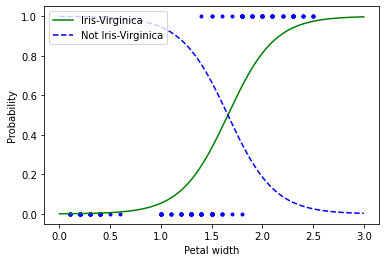

In [37]:
log_reg = LogisticRegression()
log_reg.fit(X,y)

X_new = np.linspace(0,3,1000).reshape(1000,1)
#X_new = np.atleast_2d(X_new).reshape(1000,1)
#X_new = np.transpose(X_new)
#X_new = np.linspace(0,3,1000).reshape(-1,1)  # -1은 자동으로 맞춰서 변환

print(X_new.shape)

y_proba = log_reg.predict_proba(X_new)  # test에 대해 class0(not virg) - class1(virg) 둘 다

plt.plot(X,y,"b.")
plt.plot(X_new, y_proba[:,1], "g-", label="Iris-Virginica" )
plt.plot(X_new, y_proba[:,0], "b--", label="Not Iris-Virginica" )

plt.xlabel("Petal width")
plt.ylabel("Probability")
plt.legend(loc=2)

print([[1.7],[1.5],[1.3],[2.0]])
print(log_reg.predict([[1.7],[1.5],[1.3],[2.0]]))
#모양이랑 색을 동시에 지정 가능 color = 'green' linestyle='-'  >> "g-"

#class0 과 class1의 접점 - 결정경계의 축

D:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


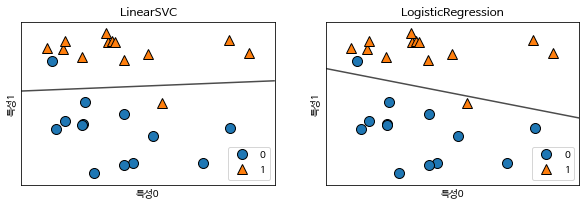

In [49]:
from sklearn.svm import LinearSVC
import mglearn

X,y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1,2, figsize=(10,3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf =model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=0.7)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("특성0")
    ax.set_ylabel("특성1")
    ax.legend(loc=4)

In [52]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test  = train_test_split(cancer.data, cancer.target,
                                                    stratify=cancer.target, random_state=42)
logreg = LogisticRegression(max_iter=5000).fit(X_train, y_train)
print("훈련 세트 점수 : {:.3f}".format(logreg.score(X_train, y_train)))
print("테스트 세트 점수 : {:.3f}".format(logreg.score(X_test, y_test)))


훈련 세트 점수 : 0.958
테스트 세트 점수 : 0.958


In [57]:
logreg = LogisticRegression(C=100, max_iter=5000).fit(X_train, y_train)
print("훈련 세트 점수 : {:.3f}".format(logreg.score(X_train, y_train)))
print("테스트 세트 점수 : {:.3f}".format(logreg.score(X_test, y_test)))

#c = 100  패널티가 inverse 1/100  패널티 약화
#훈련세트 점수가 올라감

훈련 세트 점수 : 0.984
테스트 세트 점수 : 0.965


In [58]:
logreg = LogisticRegression(C=0.01, max_iter=5000).fit(X_train, y_train)
print("훈련 세트 점수 : {:.3f}".format(logreg.score(X_train, y_train)))
print("테스트 세트 점수 : {:.3f}".format(logreg.score(X_test, y_test)))

#c = 1/100  패널티가 100.. 패널티 커짐. l2-norm . 계수가 0에 가깝게 됨

훈련 세트 점수 : 0.953
테스트 세트 점수 : 0.951


C=0.001 훈련 정확도 : 0.91
C=0.001 훈련 정확도 : 0.92
사용한 특성 3
C=1.000 훈련 정확도 : 0.96
C=1.000 훈련 정확도 : 0.96
사용한 특성 10
C=100.000 훈련 정확도 : 0.99
C=100.000 훈련 정확도 : 0.98
사용한 특성 23


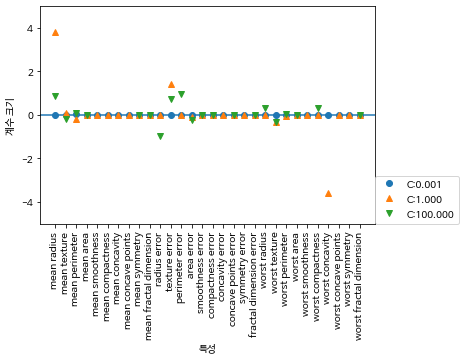

In [76]:
#L1-norm

for C, marker in zip([0.001,1,100], ['o', '^', 'v']):
    lr = LogisticRegression(solver='liblinear', C=C, penalty = "l1", max_iter=1000)
    lr = LogisticRegression(solver='liblinear', C=C, penalty = "l1", max_iter=1000)
    lr.fit(X_train, y_train)
    print("C={:.3f} 훈련 정확도 : {:.2f}".format(C, lr.score(X_train, y_train)))
    print("C={:.3f} 훈련 정확도 : {:.2f}".format(C, lr.score(X_test, y_test)))
    print("사용한 특성", np.sum(lr.coef_!=0))
    plt.plot(lr.coef_.T, marker, label="C:{:.3f}".format(C))
    
plt.xlabel("특성")
plt.ylabel("계수 크기")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlimes = plt.xlim()
plt.hlines(0,xlimes[0], xlimes[1])
plt.xlim(xlimes)
plt.ylim(-5,5)
plt.legend(loc=(1,0))

C=0.001 훈련 정확도 : 0.95
C=0.001 훈련 정확도 : 0.94
사용한 특성 30


D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C=1.000 훈련 정확도 : 0.96
C=1.000 훈련 정확도 : 0.95
사용한 특성 30
C=100.000 훈련 정확도 : 0.97
C=100.000 훈련 정확도 : 0.97
사용한 특성 30


D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


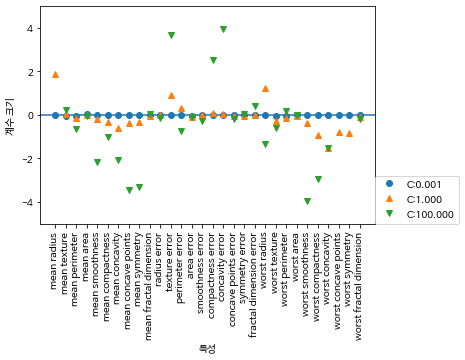

In [75]:
#L2-norm

for C, marker in zip([0.001,1,100], ['o', '^', 'v']):
    lr = LogisticRegression(C=C, max_iter=1000)
    lr.fit(X_train, y_train)
    print("C={:.3f} 훈련 정확도 : {:.2f}".format(C, lr.score(X_train, y_train)))
    print("C={:.3f} 훈련 정확도 : {:.2f}".format(C, lr.score(X_test, y_test)))
    print("사용한 특성", np.sum(lr.coef_!=0))
    plt.plot(lr.coef_.T, marker, label="C:{:.3f}".format(C))
    
plt.xlabel("특성")
plt.ylabel("계수 크기")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlimes = plt.xlim()
plt.hlines(0,xlimes[0], xlimes[1])
plt.xlim(xlimes)
plt.ylim(-5,5)
plt.legend(loc=(1,0))

c가 작으면. 규제 강화로 성능은 악화가 되나 다수의 포인터에 맞추려 함
- -> 후에 테스트 데이터에선 성능이 좋을 수 있음